# Physics-Based Scene Simulation: Visualization of car pole controlled body

This notebook visualizes the balance dynamics of a two-legged standing body using an inverted pendulum model. 
It imports simulation data from `cart_pole_body.py` and generates an animated visualization.

## Table of Contents
1. Approach
2. Equations of Motion
3. Notebook code for visualization

## 1. Approach

Use a PD controller to balance a body figure represented as an inverted pendulum attached to a horizontally movable cart (legs). The controller stabilizes both the angular position of the pole and the horizontal position of the cart simultaneously.


## 2. Equations of Motion:

The dynamics of the cart-pole model, controlled by a PD controller and horizontal position feedback, are described by the following equations:

$$
F = -K_p \theta - K_d \omega - K_x x_{\text{base}}
$$

$$
a_{\text{base}} = \frac{F}{m}
$$

$$
\tau = -m g l \sin(\theta) + F l \cos(\theta)
$$

$$
\frac{d\omega}{dt} = \frac{\tau - b \omega}{m l^2}
$$

$$
\frac{d\theta}{dt} = \omega
$$

**Where:**

- $F$ is the horizontal control force applied to the cart.
- $a_{\text{base}}$ is the horizontal acceleration of the cart.
- $x_{\text{base}}$ is the horizontal displacement of the cart from its equilibrium position.
- $\tau$ is the torque acting on the pole due to gravity and horizontal force.
- $\theta$ is the angle of the pole relative to vertical.
- $\omega$ is the angular velocity ($\frac{d\theta}{dt}$).
- $K_p, K_d$ are the proportional and derivative control gains for pole angle control.
- $K_x$ is the proportional control gain for cart position.
- $m$ is the mass.
- $g$ is gravitational acceleration.
- $l$ is the length of the pole (leg).
- $b$ is the damping coefficient.


## 3. Notebook code for visualization

In [1]:
# needed to see animation if using jupyter notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


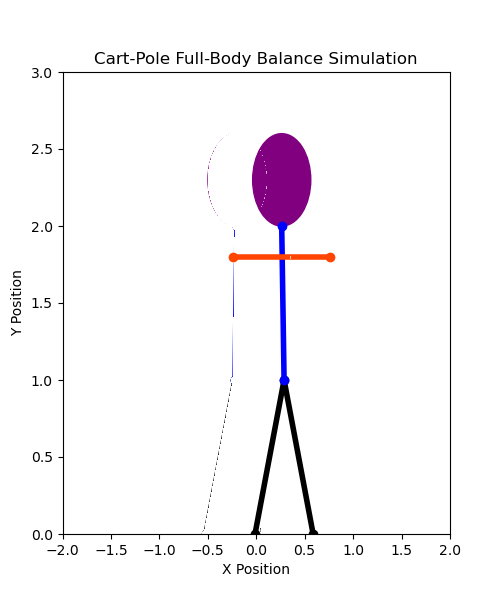

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import os

# Allow import from src directory
sys.path.append(os.path.abspath("../src/physics"))

# Import the new cart-pole body simulation
from cart_pole_body import simulate_cart_pole_body

# Run simulation
time, x_base_vals, x_torso_vals, y_torso_vals, x_arm_vals, y_arm_vals, x_head_vals, y_head_vals = simulate_cart_pole_body()

# Setup figure
fig, ax = plt.subplots(figsize=(5, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 3)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Cart-Pole Full-Body Balance Simulation")

# Initialize body parts
leg_line, = ax.plot([], [], 'o-', lw=4, color='black')
torso_line, = ax.plot([], [], 'o-', lw=4, color='blue')
arm_line, = ax.plot([], [], 'o-', lw=4, color='orangered')
head_patch = plt.Circle((0, 0), 0.3, color='purple')

# Add head to plot
ax.add_patch(head_patch)

def init():
    leg_line.set_data([], [])
    torso_line.set_data([], [])
    arm_line.set_data([], [])
    head_patch.set_center((0, 0))
    return leg_line, torso_line, arm_line, head_patch

def update(frame):
    # Hip (base) position
    x_base = x_base_vals[frame]
    y_base = 0

    # Knee (mid-leg)
    x_knee = x_base
    y_knee = 0.5 * y_torso_vals[frame]

    # Foot positions (slightly apart)
    foot1 = (x_base - 0.3, 0)
    foot2 = (x_base + 0.3, 0)

    # Legs (both to midpoint)
    x_leg = [foot1[0], x_knee, foot2[0]]
    y_leg = [foot1[1], y_knee, foot2[1]]
    leg_line.set_data(x_leg, y_leg)

    # Torso (hip to upper torso)
    x_torso = [x_base, x_torso_vals[frame]]
    y_torso = [y_base + y_knee, y_torso_vals[frame]]
    torso_line.set_data(x_torso, y_torso)

    # Arms (shoulder to shoulder)
    arm_line.set_data(x_arm_vals[frame], y_arm_vals[frame])

    # Head (circle centered above shoulders)
    head_patch.set_center((x_head_vals[frame], y_head_vals[frame]))

    return leg_line, torso_line, arm_line, head_patch

# Animate
ani = animation.FuncAnimation(
    fig, update, frames=len(time), init_func=init,
    blit=True, interval=20
)

plt.show()
